# Notes 
**Business understanding** – What’s the Airbnb business model? <br> 
**Data understanding** – Is the data complete and reliable? <br> 
**Data preparation** – Preprocessing data for EDA and predictive analytics. <br> 


# Our Client 
Airbnb was born in 2007 when two Hosts welcomed three guests to their San Francisco home, and has since grown to 4 million Hosts who have welcomed more than 1 billion guest arrivals in almost every country across the globe. Every day, Hosts offer unique stays and one-of-a-kind activities that make it possible for guests to experience the world in a more authentic, connected way.


# Defining the Problem and Project Goal
You are given a list of users along with their demographics, web session records, and some summary statistics. <br> 

The first objective of this project is to recognize **key factors that will use to know the first destination of new Airbnb Users**.<br>  The second one is to develop a **to predict which country a new user's first booking destination will be**. 

------------------------------------------------------------------------------------------------------------------

## Dataset Overview

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. 

------------------------------------------------------------------------------------------------------------------

**train_users.csv** - the training set of users
* id: user id
* date_account_created: the date of account creation
* timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
* date_first_booking: date of first booking
* gender
* age
* signup_method
* signup_flow: the page a user came to signup up from
* language: international language preference
* affiliate_channel: what kind of paid marketing
* affiliate_provider: where the marketing is e.g. google, craigslist, other
* first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
* signup_app
* first_device_type
* first_browser
* country_destination: this is the target variable you are to predict
------------------------------------------------------------------------------------------------------------------
**sessions.csv** - web sessions log for users
* user_id: to be joined with the column 'id' in users table
* action
* action_type
* action_detail
* device_type
* secs_elapsed
------------------------------------------------------------------------------------------------------------------

**countries.csv** - summary statistics of destination countries in this dataset and their locations

------------------------------------------------------------------------------------------------------------------

**age_gender_bkts.csv** - summary statistics of users' age group, gender, country of destination

------------------------------------------------------------------------------------------------------------------

**Dataset :**
https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/overview

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive/')
# import sys
# sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/')

# Importing libraries


In [2]:
## for data
import json
import pandas as pd
import numpy as np
import os
from datetime import datetime, date

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.0)




# Helper Functions


In [3]:
#Loading Data function
def load_data(DATA_PATH,name):
    """Loading the data passing the data path and the name of file"""
    csv_path=os.path.join(DATA_PATH,name)
    return pd.read_csv(csv_path)


# Get the data

In [4]:
# Let us load the data now.
#DATA_PATH="/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/"

# sessions=load_data(DATA_PATH,'sessions.csv.zip')
# countries=load_data(DATA_PATH,'countries.csv.zip')
# age_gender=load_data(DATA_PATH,'age_gender_bkts.csv.zip')

# train_users= load_data(DATA_PATH,'train_users_2.csv.zip')
# test_users= load_data(DATA_PATH,'test_users.csv.zip')



# Let us load the data now. (local)
DATA_PATH="./datasets/"

sessions=load_data(DATA_PATH,'sessions.csv')
countries=load_data(DATA_PATH,'countries.csv')
age_gender=load_data(DATA_PATH,'age_gender_bkts.csv')

train_users= load_data(DATA_PATH,'train_users_2.csv')
test_users= load_data(DATA_PATH,'test_users.csv')





#  Clean the Data



### Let us see the summary statistics of users' age group, gender, country of destination


In [5]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [6]:
print("The shape of the data is -> {} \n ".format(age_gender.shape))
age_gender.info()

The shape of the data is -> (420, 5) 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [7]:
age_gender.isnull().sum()

age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64

No missing values in this dataset

----------------------------------------------------------------------------------

**Age Bucket**

In [8]:
age_gender['age_bucket'].value_counts()

100+     20
45-49    20
5-9      20
10-14    20
15-19    20
20-24    20
25-29    20
30-34    20
35-39    20
40-44    20
50-54    20
95-99    20
55-59    20
60-64    20
65-69    20
70-74    20
75-79    20
80-84    20
85-89    20
90-94    20
0-4      20
Name: age_bucket, dtype: int64

In [9]:
# Let us see unique of age_bucket feature
age_gender['age_bucket'].unique()

array(['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74',
       '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39',
       '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
      dtype=object)

Let's make **100+** like the other values as range between **100-104**

In [10]:
age_gender['age_bucket'].replace("100+","100-104",inplace=True)
age_gender['age_bucket'].unique()

array(['100-104', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74',
       '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39',
       '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
      dtype=object)

In [11]:
age_gender[['age_bucket_Start','age_bucket_End']]=age_gender['age_bucket'].str.split('-',expand=True)
age_gender['age_bucket_Start']=age_gender['age_bucket_Start'].astype('int')
age_gender['age_bucket_End']=age_gender['age_bucket_End'].astype('int')

In [12]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year,age_bucket_Start,age_bucket_End
0,100-104,AU,male,1.0,2015.0,100,104
1,95-99,AU,male,9.0,2015.0,95,99
2,90-94,AU,male,47.0,2015.0,90,94
3,85-89,AU,male,118.0,2015.0,85,89
4,80-84,AU,male,199.0,2015.0,80,84


**Country Destination**

In [13]:
age_gender['country_destination'].value_counts()

AU    42
CA    42
DE    42
ES    42
FR    42
GB    42
IT    42
NL    42
PT    42
US    42
Name: country_destination, dtype: int64

In [14]:
age_gender['gender'].value_counts()

male      210
female    210
Name: gender, dtype: int64

**Gender**

In [15]:
age_gender['gender'].value_counts()

male      210
female    210
Name: gender, dtype: int64

Lets convert the gender into a categorical binary variable.
**'male':1 , 'female':0**

In [16]:
age_gender['gender'].replace({'male':1 , 'female':0},inplace=True)
age_gender['gender'].value_counts()

1    210
0    210
Name: gender, dtype: int64

**Year**

In [17]:
age_gender['year'].value_counts()
age_gender.drop(columns='year',inplace=True)

The data should be between **2010-2014**, but we have only value available for the year feature **2015**. so this feature will not give us any important information to us, and it's **better to drop it**

In [18]:
age_gender['population_in_thousands'].describe().T

count      420.000000
mean      1743.133333
std       2509.843202
min          0.000000
25%        396.500000
50%       1090.500000
75%       1968.000000
max      11601.000000
Name: population_in_thousands, dtype: float64

### Let us see summary statistics of destination countries in this dataset and their locations



In [19]:
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [20]:
print("The shape of the data is -> {} \n ".format(countries.shape))
countries.info()

The shape of the data is -> (10, 7) 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes


In [21]:
countries.columns

Index(['country_destination', 'lat_destination', 'lng_destination', 'distance_km', 'destination_km2', 'destination_language ', 'language_levenshtein_distance'], dtype='object')

We notice there are space in columns names let's fix it

In [22]:
countries.columns = countries.columns.str.replace(' ', '')

This dataset is **very small**, so will not do any processing in it, but will see if will need in the future or not.

### Let us work with the Sessions dataset

In [23]:
sessions.sample(20)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
5520933,89nxs4ws71,show,view,p3,Mac Desktop,144.0
1914231,cum3r4yaj2,ajax_lwlb_contact,click,contact_host,Windows Desktop,23664.0
3468962,gjpaf0itv7,search,click,view_search_results,Android App Unknown Phone/Tablet,3950.0
84916,39gy8i8lie,social_connections,-unknown-,-unknown-,iPhone,29205.0
5888351,iwg6bh8olg,request_new_confirm_email,click,request_new_confirm_email,Windows Desktop,784.0
7842533,ofh9pizdf6,reviews,data,user_reviews,Android Phone,17699.0
4973202,etwysx4eea,show,view,p3,iPhone,100950.0
10420704,7hyy9umc8j,search_results,click,view_search_results,Mac Desktop,1267.0
1036178,rks84riib9,similar_listings,data,similar_listings,Chromebook,85.0
3854449,vba39jkpmr,show,view,p3,Windows Desktop,6861.0


In [24]:
print("The shape of the data is -> {} \n ".format(sessions.shape))
sessions.info()

The shape of the data is -> (10567737, 6) 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


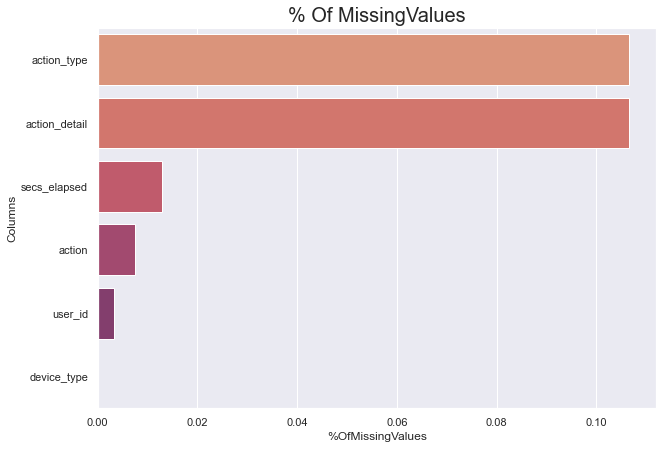

In [25]:
missingvalues=pd.DataFrame(sessions.isnull().sum()/len(sessions)).reset_index().rename(columns={"index":"Columns",0:"%OfMissingValues"}).sort_values(by='%OfMissingValues',ascending=False)
sns.barplot(x='%OfMissingValues', y='Columns', data=missingvalues[:15],palette='flare');
plt.title("% Of MissingValues",fontsize=20);
plt.savefig('MissingValues_4_sessions.png')

In [26]:
sessions.dropna(subset=['user_id'],inplace=True)
sessions.isnull().sum()


user_id                0
action             79480
action_type      1122957
action_detail    1122957
device_type            0
secs_elapsed      135483
dtype: int64

We will drop any row that has no user id, so we can merge sessions with train_users on user_id if we want.

In [27]:
sessions.columns

Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'], dtype='object')

In [28]:
#Let us see the length of uniques values for the sessions dataset
for i in ['action', 'action_type', 'action_detail', 'device_type']:
    print("The length uniques values of -{}-".format(i), "is {}\n".format(len(set(sessions[i]))))
    print("-------------------------------------------------------------------------------")
    

The length uniques values of -action- is 360

-------------------------------------------------------------------------------
The length uniques values of -action_type- is 11

-------------------------------------------------------------------------------
The length uniques values of -action_detail- is 156

-------------------------------------------------------------------------------
The length uniques values of -device_type- is 14

-------------------------------------------------------------------------------


**Action, Action type, Action detail**

In [29]:
sessions['action'].value_counts().head(10)


show                     2758985
index                     841071
search_results            723124
personalize               704782
search                    533833
ajax_refresh_subtotal     486414
similar_listings          363423
update                    362708
social_connections        337764
reviews                   319318
Name: action, dtype: int64

In [30]:
sessions['action_type'].value_counts().head(10)

view                3549375
data                2096655
click               1990058
-unknown-           1028251
submit               620063
message_post          86925
partner_callback      19053
booking_request       18762
modify                 1138
booking_response          4
Name: action_type, dtype: int64

In [31]:
sessions['action_detail'].value_counts().head(10)


view_search_results            1771026
p3                             1371626
-unknown-                      1028222
wishlist_content_update         704782
user_profile                    654626
change_trip_characteristics     486414
similar_listings                363423
user_social_connections         335577
listing_reviews                 267991
update_listing                  267776
Name: action_detail, dtype: int64

I can not see any important information can these features give to solve the problem, so will skip it for now.


**Device type**

In [32]:
sessions['device_type'].value_counts()/len(sessions['device_type'])

Mac Desktop                         0.340435
Windows Desktop                     0.251444
iPhone                              0.199060
Android Phone                       0.079367
iPad Tablet                         0.064732
Android App Unknown Phone/Tablet    0.025901
-unknown-                           0.019942
Tablet                              0.013278
Linux Desktop                       0.002655
Chromebook                          0.002114
iPodtouch                           0.000777
Windows Phone                       0.000194
Blackberry                          0.000093
Opera Phone                         0.000006
Name: device_type, dtype: float64

We checked before that if there were missing values in device_type and we did not find it, but notice when we print sample of the dataset there values in device_type have **-unknown-** value, we need to replace with NaN.

In [33]:
sessions['device_type'].replace('-unknown-', np.nan,inplace=True)
sessions['action_detail'].replace('-unknown-', np.nan,inplace=True)
sessions['action_type'].replace('-unknown-', np.nan,inplace=True)


In [34]:
sessions.isnull().sum()/len(sessions)

user_id          0.000000
action           0.007546
action_type      0.204230
action_detail    0.204228
device_type      0.019942
secs_elapsed     0.012862
dtype: float64

We do not know if we will use this dataset when we apply machine learning or not so we will leave it for now.

**Secs Elapsed**


In [35]:
sessions['secs_elapsed'].describe()

count    1.039776e+07
mean     1.941124e+04
std      8.890920e+04
min      0.000000e+00
25%      2.290000e+02
50%      1.146000e+03
75%      8.442000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

In [36]:
sessions['secs_elapsed'].isnull().sum()/len(sessions)

0.012862422876301795

In [37]:
# We will try fill NaN with mean and medien and see which better
median_sessions=sessions['secs_elapsed'].median()
mean_sessions=sessions['secs_elapsed'].mean()
sessions['secs_elapsed_fillna_with_median'] = sessions['secs_elapsed'].fillna(median_sessions)
sessions['secs_elapsed_fillna_with_mean'] = sessions['secs_elapsed'].fillna(mean_sessions)
sessions[['secs_elapsed','secs_elapsed_fillna_with_median','secs_elapsed_fillna_with_mean']].describe()

,secs_elapsed,secs_elapsed_fillna_with_median,secs_elapsed_fillna_with_mean
count,1.039776e+07,1.053324e+07,1.053324e+07
mean,1.941124e+04,1.917631e+04,1.941124e+04
std,8.890920e+04,8.835953e+04,8.833556e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.290000e+02,2.370000e+02,2.370000e+02
50%,1.146000e+03,1.146000e+03,1.188000e+03
75%,8.442000e+03,8.191000e+03,9.225000e+03
max,1.799977e+06,1.799977e+06,1.799977e+06


As we can see above, filling in the missing values with the **median is better**, because there are **no significant changes** in the **summary of statistics**.

### Let us work with the Training Users¶ dataset

In [38]:
train_users.sample(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
142200,k3yo181x0g,2014-01-15,20140115195307,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NDF
86764,kral3clqwg,2013-06-26,20130626225020,2013-06-27,FEMALE,39.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
43280,rk5ccybmgd,2012-10-02,20121002171035,NaN,FEMALE,34.0,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,NDF
43501,ekgbxggesa,2012-10-04,20121004004124,2012-10-05,FEMALE,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
153692,kno1y58ygo,2014-02-17,20140217032948,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF
70331,d5swhjee2s,2013-04-11,20130411034546,NaN,MALE,35.0,facebook,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NDF
149046,dmpkfnd60l,2014-02-04,20140204022638,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
112487,0c0jicfyl3,2013-09-29,20130929185550,2013-10-01,FEMALE,50.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US
59967,jh5npswx7b,2013-02-11,20130211050729,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox,NDF
35418,radu92ydm5,2012-08-07,20120807154608,NaN,FEMALE,NaN,basic,0,en,direct,direct,linked,Web,Mac Desktop,Safari,NDF


In [39]:
print("The shape of the data is -> {} \n ".format(train_users.shape))
train_users.info()

The shape of the data is -> (213451, 16) 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_ty

In [40]:
train_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [41]:
train_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'], dtype='object')

In [42]:
#Let us see the length of uniques values for the sessions dataset
for i in ['gender', 'signup_method', 'language','affiliate_channel','affiliate_provider','first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']:
    print("The length uniques values of >> {} << : \n{}".format(i,set(train_users[i])))
    print("-------------------------------------------------------------------------------")
    

The length uniques values of >> gender << : 
{'OTHER', 'MALE', '-unknown-', 'FEMALE'}
-------------------------------------------------------------------------------
The length uniques values of >> signup_method << : 
{'facebook', 'basic', 'google'}
-------------------------------------------------------------------------------
The length uniques values of >> language << : 
{'hr', 'ca', 'ko', 'ru', 'es', 'id', 'is', 'el', 'hu', 'zh', 'cs', 'pl', 'it', 'nl', 'en', 'th', 'tr', 'fr', 'de', 'pt', 'no', 'fi', 'sv', 'ja', 'da'}
-------------------------------------------------------------------------------
The length uniques values of >> affiliate_channel << : 
{'direct', 'remarketing', 'content', 'sem-non-brand', 'other', 'sem-brand', 'seo', 'api'}
-------------------------------------------------------------------------------
The length uniques values of >> affiliate_provider << : 
{'craigslist', 'direct', 'yahoo', 'padmapper', 'wayn', 'yandex', 'vast', 'meetup', 'facebook', 'daum', 'googl

In [43]:
#Let us see the length of uniques values for the sessions dataset
for i in ['gender', 'signup_method', 'language','affiliate_channel','affiliate_provider','first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']:
    print("The uniques values of >> {} << : \n{}".format(i,set(train_users[i])))
    print("-------------------------------------------------------------------------------")
    

The uniques values of >> gender << : 
{'OTHER', 'MALE', '-unknown-', 'FEMALE'}
-------------------------------------------------------------------------------
The uniques values of >> signup_method << : 
{'facebook', 'basic', 'google'}
-------------------------------------------------------------------------------
The uniques values of >> language << : 
{'hr', 'ca', 'ko', 'ru', 'es', 'id', 'is', 'el', 'hu', 'zh', 'cs', 'pl', 'it', 'nl', 'en', 'th', 'tr', 'fr', 'de', 'pt', 'no', 'fi', 'sv', 'ja', 'da'}
-------------------------------------------------------------------------------
The uniques values of >> affiliate_channel << : 
{'direct', 'remarketing', 'content', 'sem-non-brand', 'other', 'sem-brand', 'seo', 'api'}
-------------------------------------------------------------------------------
The uniques values of >> affiliate_provider << : 
{'craigslist', 'direct', 'yahoo', 'padmapper', 'wayn', 'yandex', 'vast', 'meetup', 'facebook', 'daum', 'google', 'email-marketing', 'bing', 'oth

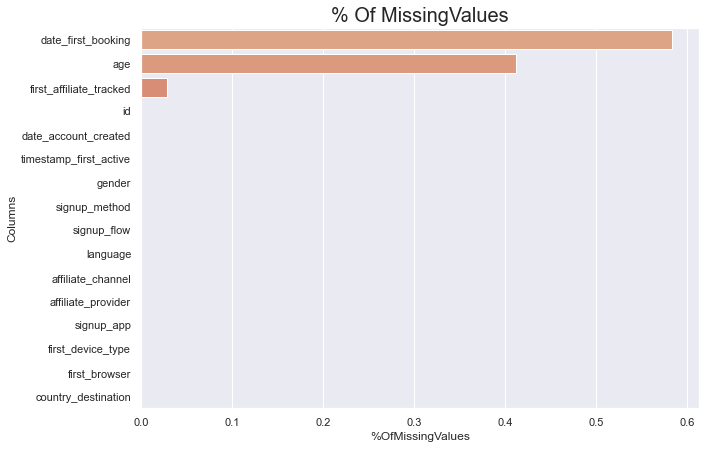

In [44]:
missingvalues=pd.DataFrame(train_users.isnull().sum()/len(train_users)).reset_index().rename(columns={"index":"Columns",0:"%OfMissingValues"}).sort_values(by='%OfMissingValues',ascending=False)
sns.barplot(x='%OfMissingValues', y='Columns', data=missingvalues,palette='flare');
plt.title("% Of MissingValues",fontsize=20);


We see that there are null values in the columns **age**, **country_destination**,
**date_first_booking**, **first_affiliate_tracked**.

In [45]:
train_users.drop(columns='date_first_booking',inplace=True)


We dropped **date_first_booking** since there are no values for it in test data and more than 60% in train data is missing also.

In [46]:
for i in['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']:
    train_users[i]=train_users[i].astype('category')

**Gender**

In [47]:
train_users['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [48]:
# Lets replace the unknown in gender with NaN
train_users['gender'].replace('-unknown-', np.nan,inplace=True)
train_users['gender'].unique()

[NaN, 'MALE', 'FEMALE', 'OTHER']
Categories (3, object): ['FEMALE', 'MALE', 'OTHER']

**First browser**

In [49]:
train_users['first_browser'].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
SeaMonkey                  11
CometBird                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
Flock     

In [50]:
# Lets replace the unknown in first_browser with NaN
train_users['first_browser'].replace('-unknown-', np.nan,inplace=True)
train_users['first_browser'].value_counts()


Chrome                  63845
Safari                  45169
Firefox                 33655
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
SeaMonkey                  11
CometBird                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
Flock                       2
OmniWeb   

**Age**

In [51]:
train_users['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

First, we have noticed **unrealistic values** in the data, for example, **that the oldest age in the dataset is 2014.**<br>
**After searching**,<br> we found that **World’s oldest woman age in the world is 119**<br>
and **the World’s oldest man age in the world is 112**

Secondly, We have noticed in the data, the minimum age is one year, and after referring to the company, we found that **not allow anyone under the age of 18 to create an account** to travel or host.<br>

**references:**<br>
* the man oldest age: https://www.ndtv.com/world-news/worlds-oldest-man-dies-at-age-112-3-weeks-before-113th-birthday-2716204<br>
* the man women age: https://www.news24.com/you/news/international/worlds-oldest-woman-aiming-for-120-20220104<br>

* Age requirements on Airbnb : https://www.airbnb.com/help/article/2876/age-requirements<br>

In [52]:
train_users.loc[train_users.age >= 119, 'age'] = np.nan
train_users.loc[train_users.age <= 18, 'age'] = np.nan

In [53]:
train_users['age'].isnull().sum()/len(train_users['age'])

0.41975910162051244

We will handle missing values later in feature engineering

In [54]:
train_users['age'].describe()

count    123853.000000
mean         37.548885
std          13.894606
min          19.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         115.000000
Name: age, dtype: float64

---------------------------------------------------------------------------------------------------
Let us **fix datetime in dataset for date_account_created and timestamp_first_active**

**Date account created**

In [55]:
train_users['date_account_created']=pd.to_datetime(train_users['date_account_created'],format="%Y-%m-%d")

In [56]:
train_users['timestamp_first_active']=train_users['timestamp_first_active']\
                                                     .astype(str).apply(lambda x: datetime(year=int(x[0:4]),
                                                                                           month=int(x[4:6]),
                                                                                           day=int(x[6:8]),
                                                                                           hour=int(x[8:10]), 
                                                                                           minute=int(x[10:12]), 
                                                                                           second=int(x[12:])))


In [57]:
train_users[['date_account_created','timestamp_first_active']].head()

,date_account_created,timestamp_first_active
0,2010-06-28,2009-03-19 04:32:55
1,2011-05-25,2009-05-23 17:48:09
2,2010-09-28,2009-06-09 23:12:47
3,2011-12-05,2009-10-31 06:01:29
4,2010-09-14,2009-12-08 06:11:05


From just looking to the first 5 rows of the dataset, we noticed there **difference between first active and the date account created**

### Let us work with the Testing Users¶ dataset

In [58]:
test_users.sample(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
18449,qwny0bd0s6,2014-07-27,20140727211457,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox
52835,fcmjkfupo0,2014-09-16,20140916005424,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
51718,5qfwyx51vw,2014-09-14,20140914034549,NaN,-unknown-,29.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome
59142,3uds40isu3,2014-09-26,20140926010431,NaN,MALE,56.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
38505,9xqted92xp,2014-08-25,20140825070955,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,iPhone,Mobile Safari
13404,6wrddm9iza,2014-07-22,20140722005058,NaN,FEMALE,24.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
1703,ojfvc2ph23,2014-07-03,20140703192401,NaN,FEMALE,39.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
4719,gcrnw003k0,2014-07-09,20140709055945,NaN,-unknown-,NaN,basic,0,en,sem-brand,bing,omg,Web,Mac Desktop,Safari
7956,ui6scgtz0l,2014-07-15,20140715054905,NaN,-unknown-,26.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Chrome
11941,5huhc2jsjc,2014-07-20,20140720050559,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-


In [59]:
print("The shape of the data is -> {} \n ".format(test_users.shape))
test_users.info()

The shape of the data is -> (62096, 15) 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 no

In [60]:
#Let us see the length of uniques values for the sessions dataset
for i in ['gender', 'signup_method', 'language','affiliate_channel','affiliate_provider','first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']:
    print("The length uniques values of >> {} << : \n{}".format(i,set(test_users[i])))
    print("-------------------------------------------------------------------------------")
    

The length uniques values of >> gender << : 
{'OTHER', 'MALE', '-unknown-', 'FEMALE'}
-------------------------------------------------------------------------------
The length uniques values of >> signup_method << : 
{'facebook', 'basic', 'weibo', 'google'}
-------------------------------------------------------------------------------
The length uniques values of >> language << : 
{'ca', 'ko', 'ru', 'es', 'id', 'el', 'hu', 'zh', 'cs', 'pl', 'it', 'nl', 'en', 'th', 'tr', 'de', 'fr', 'pt', '-unknown-', 'no', 'fi', 'sv', 'ja', 'da'}
-------------------------------------------------------------------------------
The length uniques values of >> affiliate_channel << : 
{'direct', 'remarketing', 'content', 'sem-non-brand', 'other', 'sem-brand', 'seo'}
-------------------------------------------------------------------------------
The length uniques values of >> affiliate_provider << : 
{'craigslist', 'direct', 'yandex', 'padmapper', 'meetup', 'facebook-open-graph', 'facebook', 'vast', 'daum

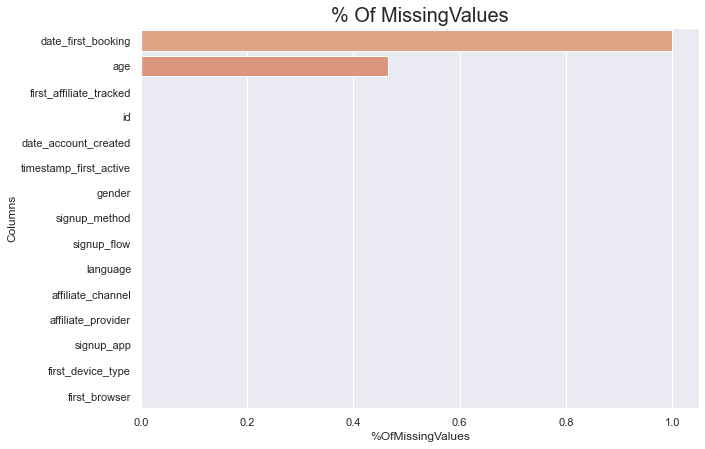

In [61]:
missingvalues=pd.DataFrame(test_users.isnull().sum()/len(test_users)).reset_index().rename(columns={"index":"Columns",0:"%OfMissingValues"}).sort_values(by='%OfMissingValues',ascending=False)
sns.barplot(x='%OfMissingValues', y='Columns', data=missingvalues,palette='flare');
plt.title("% Of MissingValues",fontsize=20);


In [62]:
test_users.drop(columns='date_first_booking',inplace=True)
test_users['gender'].replace('-unknown-', np.nan,inplace=True)
test_users['first_browser'].replace('-unknown-', np.nan,inplace=True)
test_users['language'].replace('-unknown-', np.nan,inplace=True)


In [65]:
test_users['date_account_created']=pd.to_datetime(test_users['date_account_created'],format="%Y-%m-%d")
test_users['timestamp_first_active']=pd.to_datetime(test_users['timestamp_first_active']\
                                                     .astype(str).apply(lambda x: datetime(year=int(x[0:4]),
                                                                                           month=int(x[4:6]),
                                                                                           day=int(x[6:8]),
                                                                                           hour=int(x[8:10]), 
                                                                                           minute=int(x[10:12]), 
                                                                                           second=int(x[12:]))))


In [66]:
test_users.loc[test_users.age >= 119, 'age'] = np.nan
test_users.loc[test_users.age <= 18, 'age'] = np.nan

In [67]:
#Let us see the length of uniques values for the sessions dataset
for i in ['gender', 'signup_method', 'language','affiliate_channel','affiliate_provider','first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']:
    print("The length uniques values of >> {} << : \n{}".format(i,set(test_users[i])))
    print("-------------------------------------------------------------------------------")
    

The length uniques values of >> gender << : 
{nan, 'MALE', 'OTHER', 'FEMALE'}
-------------------------------------------------------------------------------
The length uniques values of >> signup_method << : 
{'facebook', 'basic', 'weibo', 'google'}
-------------------------------------------------------------------------------
The length uniques values of >> language << : 
{nan, 'ca', 'ko', 'ru', 'es', 'id', 'el', 'hu', 'zh', 'cs', 'pl', 'it', 'nl', 'en', 'th', 'tr', 'de', 'fr', 'pt', 'no', 'fi', 'sv', 'ja', 'da'}
-------------------------------------------------------------------------------
The length uniques values of >> affiliate_channel << : 
{'direct', 'remarketing', 'content', 'sem-non-brand', 'other', 'sem-brand', 'seo'}
-------------------------------------------------------------------------------
The length uniques values of >> affiliate_provider << : 
{'craigslist', 'direct', 'yandex', 'padmapper', 'meetup', 'facebook-open-graph', 'facebook', 'vast', 'daum', 'google', 'em

In [68]:
# Let us save the data after cleaning.
# sessions.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/sessions_v1.p')
# countries.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/countries_v1.p')
# age_gender.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/age_gender_bkts_v1.p')

# train_users.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/train_users_2_v1.p')
# test_users.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Airbnb New User Bookings/datasets/afterCleaning/test_users_v1.p')




# Let us save the data after cleaning. (local)
sessions.to_pickle('./datasets/afterCleaning/sessions_v1.p')
countries.to_pickle('./datasets/afterCleaning/countries_v1.p')
age_gender.to_pickle('./datasets/afterCleaning/age_gender_bkts_v1.p')

train_users.to_pickle('./datasets/afterCleaning/train_users_2_v1.p')
test_users.to_pickle('./datasets/afterCleaning/test_users_v1.p')
